In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image as img
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers.experimental import preprocessing
import cv2

In [23]:
data = pd.read_csv('./data/HAM10000_metadata.csv')

In [24]:
data['path'] = './data/HAM10000/' + data['image_id'] + '.jpg'

In [25]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,./data/HAM10000/ISIC_0031633.jpg


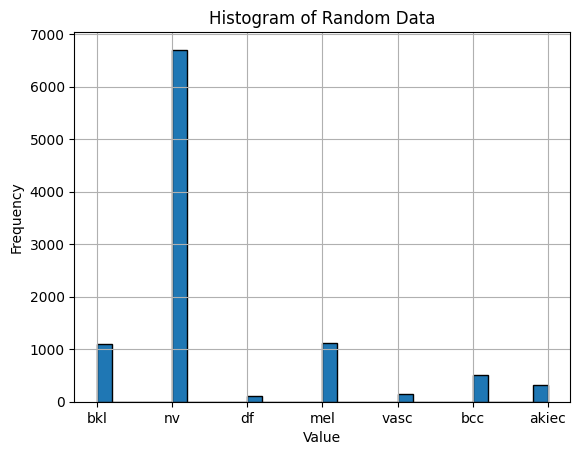

In [26]:
plt.hist(data['dx'], bins=30, edgecolor='black')
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [27]:
one_hot = pd.get_dummies(data['dx'])

In [28]:
one_hot.head()

,akiec,bcc,bkl,df,mel,nv,vasc
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [29]:
data = pd.concat([data, one_hot], axis=1)

In [30]:
data

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,akiec,bcc,bkl,df,mel,nv,vasc
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0027419.jpg,0,0,1,0,0,0,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0025030.jpg,0,0,1,0,0,0,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0026769.jpg,0,0,1,0,0,0,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0025661.jpg,0,0,1,0,0,0,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,./data/HAM10000/ISIC_0031633.jpg,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,./data/HAM10000/ISIC_0033084.jpg,1,0,0,0,0,0,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,./data/HAM10000/ISIC_0033550.jpg,1,0,0,0,0,0,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,./data/HAM10000/ISIC_0033536.jpg,1,0,0,0,0,0,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,./data/HAM10000/ISIC_0032854.jpg,1,0,0,0,0,0,0


In [31]:
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)    
    if image is not None:
        image = cv2.resize(image, (28,28))
        image = image.astype(np.float32) / 255.0
    return image

In [32]:
images = [load_image(image_path) for image_path in data['path']]
images = np.array(images)

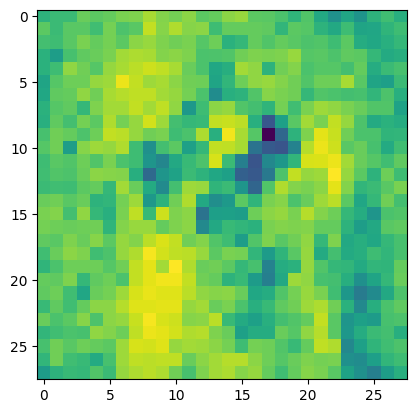

In [33]:
plt.imshow(images[0])
plt.show()

In [34]:
images[0].shape

(28, 28)

In [35]:
targets = data[['akiec','bcc','bkl','df','mel','nv','vasc']].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    images, targets, test_size=0.2, random_state=42)

In [37]:
len(X_train)

8012

In [38]:
len(X_test)

2003

In [39]:
EarlyStop = keras.callbacks.EarlyStopping(min_delta=0.001, patience=10, verbose=0)

model = keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(40, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(7, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Bat  (None, 13, 13, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                      

Epoch 1/100
251/251 [==============================] - 2s 7ms/step - loss: 1.3194 - accuracy: 0.5673 - val_loss: 1.3773 - val_accuracy: 0.3600
Epoch 2/100
251/251 [==============================] - 1s 5ms/step - loss: 1.0454 - accuracy: 0.6669 - val_loss: 1.0427 - val_accuracy: 0.6605
Epoch 3/100
251/251 [==============================] - 1s 6ms/step - loss: 0.9892 - accuracy: 0.6842 - val_loss: 1.0140 - val_accuracy: 0.6605
Epoch 4/100
251/251 [==============================] - 1s 5ms/step - loss: 0.9545 - accuracy: 0.6881 - val_loss: 1.0059 - val_accuracy: 0.6580
Epoch 5/100
251/251 [==============================] - 1s 5ms/step - loss: 0.9178 - accuracy: 0.6925 - val_loss: 0.9031 - val_accuracy: 0.6865
Epoch 6/100
251/251 [==============================] - 1s 5ms/step - loss: 0.9066 - accuracy: 0.6963 - val_loss: 0.8798 - val_accuracy: 0.6965
Epoch 7/100
251/251 [==============================] - 1s 6ms/step - loss: 0.8859 - accuracy: 0.7033 - val_loss: 1.0305 - val_accuracy: 0.6530

<AxesSubplot:>

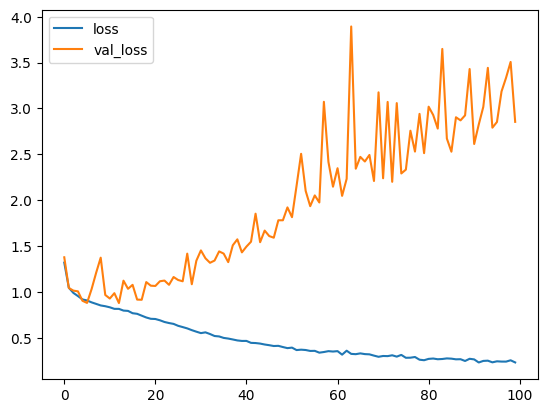

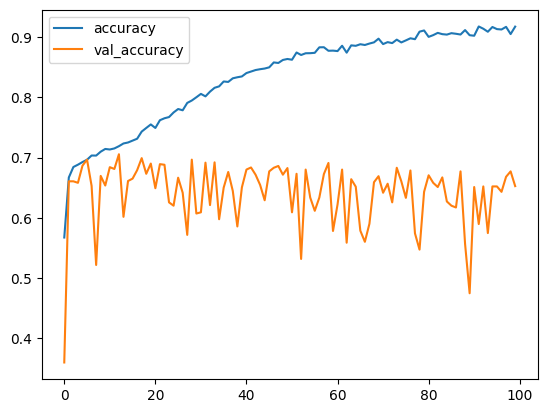

In [41]:
# train = model.fit(X_train, y_train,
#                   batch_size=32,
#                   epochs=100,
#                   callbacks=[EarlyStop],
#                   validation_data=(X_test, y_test))

train = model.fit(X_train, y_train,
                  batch_size=32,
                  epochs=100,
                  validation_data=(X_test, y_test))

history_df = pd.DataFrame(train.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

print('---------------------------------------------------------------------------------------')

history_df = pd.DataFrame(train.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

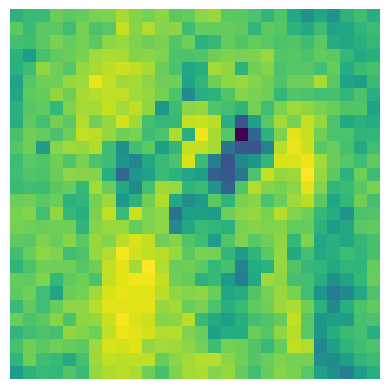

In [47]:
image = images[0]
plt.imshow(image)
plt.axis('off')
plt.show()

In [48]:
test_image = image.reshape(1, 28, 28, 1)
predictions = model.predict(test_image)
print(predictions)

1/1 [==============================] - 0s 13ms/step
[[5.08690886e-02 3.95052609e-07 9.49119329e-01 7.54123847e-11
  1.12136395e-05 2.44468269e-12 9.34345674e-20]]


In [50]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,akiec,bcc,bkl,df,mel,nv,vasc
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0027419.jpg,0,0,1,0,0,0,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0025030.jpg,0,0,1,0,0,0,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0026769.jpg,0,0,1,0,0,0,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,./data/HAM10000/ISIC_0025661.jpg,0,0,1,0,0,0,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,./data/HAM10000/ISIC_0031633.jpg,0,0,1,0,0,0,0


In [ ]:
# model.save("./weights/train_1.h5")